#### 1. Explore manually the website http://sofifa.com.

Under the tab 'All', the URL is http://sofifa.com/players?offset=0. After pressing on the any of Argentinian flags, e.g. L. Messi, the URL changes to http://sofifa.com/players?na=52. 

When clicking the 'Next', the URL changes to http://sofifa.com/players?na=52&offset=100. Clicking one player, e.g. Jonathan Calleri, the URL changes to http://sofifa.com/player/219455.

We can notice that only the last part of the URL changed, from 'offset=0' to 'na=52', then to 'na=52&offset=100', and then to '219455'.

We thus speculate that all these webpages are children webpages of 'player' section (the URL could indicate the structure/ logic of the webpages). 'offset=0' indicates all players; 'na=52' indicates the nation ID, i.e. the ID of Argentina is 52; 'na=52&offset=100' indicates the second 100 Argentinian players; and '219455' indicates the player ID.

#### 2. Explain in detail the code below.

In [2]:
import pandas as pd
from bs4 import BeautifulSoup 
import requests
import re
import unicodedata

In [6]:

# 'attributes' stores the player's attributes on the player page.
attributes = ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling','Curve',
              'Free Kick Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 
              'Reactions', 'Balance','Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 
              'Interceptions', 'Positioning','Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 
              'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']


links = [] # Download data for all 300 Argentinian players 
for offset in ['0', '100', '200']:
    page = requests.get('http://sofifa.com/players?na=52&offset='+offset)
    soup = BeautifulSoup(page.content, 'html.parser') 
    
    # Beautiful Soup is a Python library for extracting data from HTML and XML files.
    # A BeautifulSoup object returns the HTML (source code) of a webpage, 
    # which represents the document as a nested data structure.
    
    # This loop extracts all the URLs found within a page’s <a> tags.
    for link in soup.find_all('a'): 
        links.append(link.get('href'))
           
# 'links' stores the URLs of all 300 players.   
links = ['http://sofifa.com' + l for l in links if 'player/' in l]
 
# Regular expressions are a pattern matching standard for string parsing and replacement.

# pattern for regular expression

pattern = r"""\s*([\w\s]*)""" 
# file starts with empty spaces...players name...− other stuff 

for attr in attributes :
    pattern += r""".*?(\d*\s*""" + attr + r""")""" 
    # for each attribute we have other stuff...number...attribute...other stuff

pat = re.compile(pattern, re.DOTALL) # parsing multiline text
# Use 're.compile' to store the 'pattern' in pat for reusage.

# Iterate all the 300 payers page links and extract the data from each page
rows = []
for j , link in enumerate(links):
    print(j , link)
    row = [link]
    playerpage = requests.get(link)
    playersoup = BeautifulSoup(playerpage.content, 'html.parser')
    
    # get_text() method returns all the text in a document or beneath a tag as a single Unicode string.
    # here it returns all the text in a player page
    text = playersoup.get_text()
    
    # Built-in function: Return the normal form 'form' for the Unicode string unistr.
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore')
    
    a = pat.match(text.decode()) 
    # The original code causes TypeError: cannot use a string pattern on a bytes-like object
    # To make this code works, we need to convert the bytes object to str by adding decode method.
    
    # a.group(1) is the player's name
    # the rest of groups are in the format of 'number attribute'
    row.append(a.group(1))
    # retrieve the number of each attribute
    for i in range(2,len(attributes)+2):
        # row stores the data of link, player name and his number of each attribute
        row.append(int(a.group(i).split()[0]))
    rows.append(row)
    print(row[1])

# create a data frame and save the data to a csv file
df = pd.DataFrame(rows, columns = ['link', 'name'] + attributes) 
df.to_csv ('ArgentinaPlayers.csv', index = False)

0 http://sofifa.com/player/158023
Lionel Messi 
1 http://sofifa.com/player/167664
Gonzalo Higuain 
2 http://sofifa.com/player/153079
Sergio Aguero 
3 http://sofifa.com/player/183898
Angel Di Maria 
4 http://sofifa.com/player/211110
Paulo Dybala 
5 http://sofifa.com/player/184144
Nicolas Gaitan 
6 http://sofifa.com/player/192366
Nicolas Otamendi 
7 http://sofifa.com/player/178562
Ever Banega 
8 http://sofifa.com/player/142754
Javier Mascherano 
9 http://sofifa.com/player/201399
Mauro Icardi 
10 http://sofifa.com/player/191180
Javier Pastore 
11 http://sofifa.com/player/215316
Geronimo Rulli 
12 http://sofifa.com/player/201862
Marcos Rojo 
13 http://sofifa.com/player/186547
Mateo Musacchio 
14 http://sofifa.com/player/142780
Gonzalo Rodriguez 
15 http://sofifa.com/player/170481
Ezequiel Garay 
16 http://sofifa.com/player/142784
Pablo Zabaleta 
17 http://sofifa.com/player/158963
Lucas Biglia 
18 http://sofifa.com/player/176915
Augusto Fernandez 
19 http://sofifa.com/player/193061
Roberto 

#### 3. How would you change the code to download the first 500 English players instead?

The code below is the part that needs to be changed.
+ we add 300 and 400 to offset to increase the number of players to 500;
+ we change na id to 14 as the 14 represents England.

In [ ]:
links = [] # Download data for all 500 English players 
for offset in ['0', '100', '200', '300', '400']:
    page = requests.get('http://sofifa.com/players?na=14&offset='+offset) #England is na=14
    soup = BeautifulSoup(page.content, 'html.parser') 
    for link in soup.find_all('a'): 
        links.append(link.get('href'))

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup 
import requests
import re
import unicodedata

attributes = ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling','Curve',
              'Free Kick Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 
              'Reactions', 'Balance','Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 
              'Interceptions', 'Positioning','Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 
              'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']


links = [] # Download data for all 500 English players 
for offset in ['0', '100', '200', '300', '400']:
    page = requests.get('http://sofifa.com/players?na=14&offset='+offset) #England is na=14
    soup = BeautifulSoup(page.content, 'html.parser') 
    for link in soup.find_all('a'): 
        links.append(link.get('href'))
           
# 'links' stores the URLs of all 300 players.   
links = ['http://sofifa.com' + l for l in links if 'player/' in l]
 

# pattern for regular expression

#pattern = r"""\s*([\w\s]*)""" 
# the original pattern creates an unnessary whitespace after the last name, we change it to
pattern = r'\s*(\w*\s\w*)'
# file starts with empty spaces...players name...− other stuff 

for attr in attributes :
    pattern += r""".*?(\d*\s*""" + attr + r""")"""
    # for each attribute we have other stuff...number...attribute...other stuff

pat = re.compile(pattern, re.DOTALL) # parsing multiline text

rows = []
for j , link in enumerate(links):
    #print(j , link)
    row = [link]
    playerpage = requests.get(link)
    playersoup = BeautifulSoup(playerpage.content, 'html.parser')
    text = playersoup.get_text()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore')
    
    a = pat.match(text.decode()) 
    row.append(a.group(1))
    for i in range(2,len(attributes)+2):
        row.append(int(a.group(i).split()[0]))
    rows.append(row)
    #print(row[1])
print('Download completed.')

df = pd.DataFrame(rows, columns = ['link', 'name'] + attributes) 
df.to_csv ('EnglishPlayers.csv', index = False)

#### 4. Use the sklearn.cluster.KMeans Python class to cluster the players into 5 clusters.

In [3]:
df = pd.read_csv('ArgentinaPlayers.csv')

In [4]:
print(df.head())

                              link              name  Crossing  Finishing  \
0  http://sofifa.com/player/158023     Lionel Messi         77         95   
1  http://sofifa.com/player/167664  Gonzalo Higuain         68         92   
2  http://sofifa.com/player/153079    Sergio Aguero         70         90   
3  http://sofifa.com/player/183898   Angel Di Maria         88         74   
4  http://sofifa.com/player/211110     Paulo Dybala         78         89   

   Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  \
0                71             88       85         97     89   
1                80             73       88         84     69   
2                68             79       85         89     82   
3                53             83       77         87     83   
4                65             80       86         91     86   

   Free Kick Accuracy     ...       Penalties  Composure  Marking  \
0                  90     ...              74         94       13   
1       

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=5, random_state=0).fit(df.drop(['link','name'], axis=1))

In [7]:
df['cluster'] = km.labels_

In [8]:
print('Number of players in each cluster:')
print()
print(df.groupby('cluster').count().ix[:,'name'])

Number of players in each cluster:

cluster
0    26
1    85
2    59
3    86
4    44
Name: name, dtype: int64


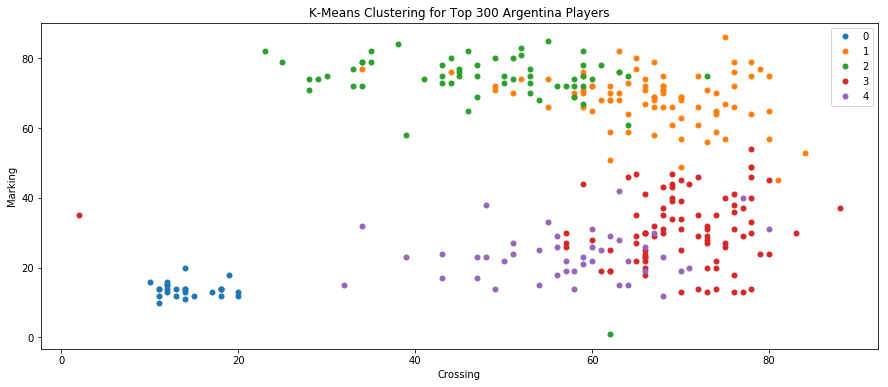

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(15,6))
ax = f.add_subplot(111)
clusters = df.groupby('cluster')

for name, cluster in clusters:
    ax.plot(cluster.Crossing, cluster.Marking, marker='.', linestyle='', ms=10, label=name)
    
ax.legend()
plt.xlabel('Crossing')
plt.ylabel('Marking')
plt.title('K-Means Clustering for Top 300 Argentina Players')
plt.show()

As the questions does not ask to do Principle Component Analysis (PCA) for dimensionality reduction, we used all the attributes as input variables to do K-means clustering. By default 10 iterations was used and the clusters could be changing subject to the number of iterations. Crossing and Marking were chosen only for clusters visualisation purpose in the two-dimension (as they are the attributes from Attaching and Defending). From the scatter plot, we can see that K-means did give five distinct clusters.

#### 5. By inspecting the clusters and looking up individual players online, try to assign meaningful labels to the clusters.

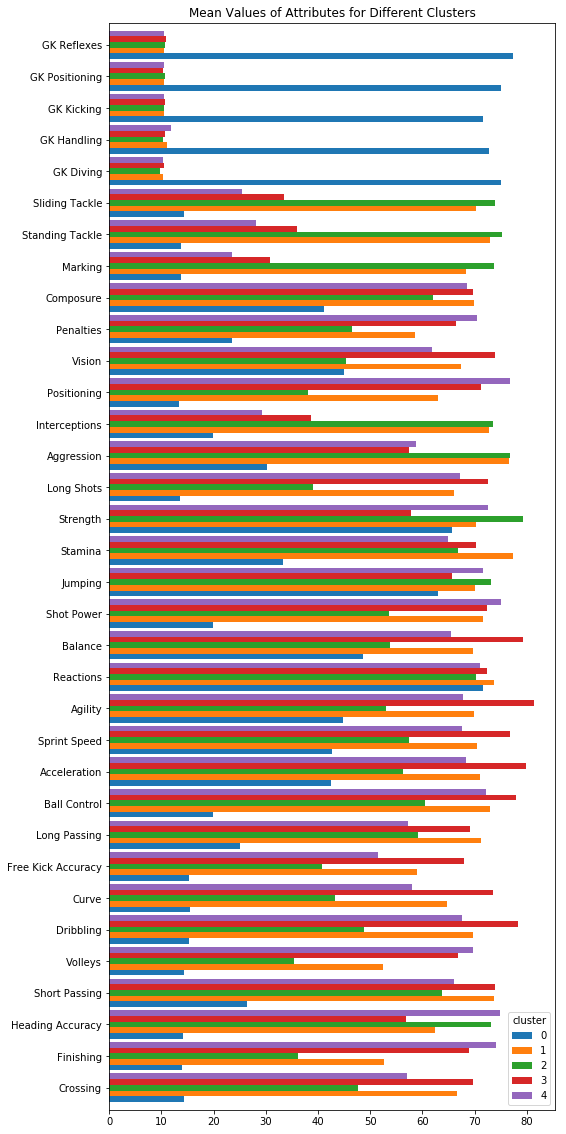

In [10]:
df.groupby('cluster').mean().T.plot(kind='barh', figsize=(8,20), width=0.9, 
                                    title='Mean Values of Attributes for Different Clusters')
plt.show()

These attributes could be summarised into 7 categories, including Attacking, Skill, Movement, Power, Mentality, Defending and Goalkeeping.

Cluster 0 has distinct scores in Goalkeeping attributes (start with 'GK'), compared with the rest of clusters. Sample checking shows that these players are Goalkeepers. Hence, we assign the label 'Goalkeepers' to cluster 0.

Cluster 1 has high scores in defense statistics, such as Sliding Tackle, Standing tackle, Aggression, and also has high score in agility, long passing and short passing, indicating the players in cluster 1 have high ability of defending and assisting attack. Sample checking shows that most of these players are Middlefielders and Backs. Hence, we assign the label 'Man-to-man Marking Defenders' to cluster 1.

Cluster 2 has high scores in Defending (Marking, Standing Tackle and Sliding Tackle), Power (Strength and Jumping) and Mentality (Aggression and Interceptions). Sample checking shows that these players are mostly Centre Backs. Hence, we assign the label ‘Zonal Marking Defenders’ to cluster 2.

Cluster 3 has distinct scores in all the categories but Defending, Goalkeeping and some attributes in Mentality (Aggression and Interceptions). Sample checking shows that most of these players are in attacking positions such as wingers or strikers. Hence, we assign the label 'Attackers' to cluster 3.

Cluster 4 has high scores in Attacking (Finishing, Head Accuracy and Volleys), Power (Shot Power, Long Shots, Jumping and Strength) and Mentality (Positioning and Penalities. Sample checking shows that they come from a range of positions). Not all of the players in cluster 4 are Strikers, but they have outstanding skills of converting goal scoring opportunities. Hence, we assign the label ‘Finishers’ to cluster 4.


In [16]:
# manually check the players in each cluster
#print(df.ix[df.cluster==0,:][['link','name']])
#print(df.ix[df.cluster==1,:][['link','name']])
#print(df.ix[df.cluster==2,:][['link','name']])
#print(df.ix[df.cluster==3,:][['link','name']])
#print(df.ix[df.cluster==4,:][['link','name']])

In [17]:
# Create a new column to assign the label
for i in df.index:
    if df.ix[i, 'cluster'] == 0:
        df.ix[i, 'cluster_label'] = 'Goalkeepers'
    elif df.ix[i, 'cluster'] == 1:
        df.ix[i, 'cluster_label'] = 'Man-to-man Marking Defenders'
    elif df.ix[i, 'cluster'] == 2:
        df.ix[i, 'cluster_label'] = 'Zonal Marking Defenders'
    elif df.ix[i, 'cluster'] == 3:
        df.ix[i, 'cluster_label'] = 'Attackers'
    elif df.ix[i, 'cluster'] == 4:
        df.ix[i, 'cluster_label'] = 'Finishers'

In [18]:
cluster_label = {0: 'Goalkeepers', 1: 'Man-to-man Marking Defenders', 2: 'Zonal Marking Defenders', 3: 'Attackers', 4: 'Finishers'}
print(pd.DataFrame(cluster_label, index=['Label']))

                 0                             1                        2  \
Label  Goalkeepers  Man-to-man Marking Defenders  Zonal Marking Defenders   

               3          4  
Label  Attackers  Finishers  


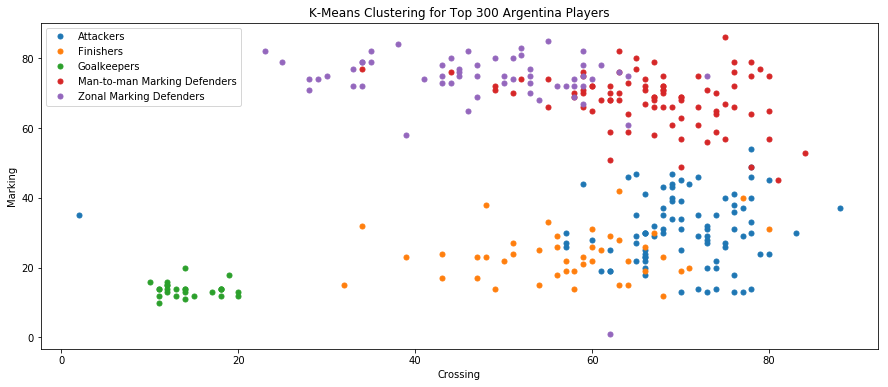

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(15,6))
ax = f.add_subplot(111)
clusters = df.groupby('cluster_label')

for name, cluster in clusters:
    ax.plot(cluster.Crossing, cluster.Marking, marker='.', linestyle='', ms=10, label=name)
    
ax.legend()
plt.xlabel('Crossing')
plt.ylabel('Marking')
plt.title('K-Means Clustering for Top 300 Argentina Players')
plt.show()

#### 6. For a new and unknown player, the following attributes are available:

For each of your 5 clusters from Step 4, compute the cluster centroid. Assign the new player to the nearest cluster based on the distance to the cluster centroids, using only the available attributes.

In [20]:
new = {'Crossing': 45, 'Sprint Speed': 40, 'Long Shots': 35, 
       'Aggression': 45, 'Marking': 60, 'Finishing': 40, 'GK Handling': 15}
new_df = pd.DataFrame(new, index=['Number']).T
print(new_df)

              Number
Aggression        45
Crossing          45
Finishing         40
GK Handling       15
Long Shots        35
Marking           60
Sprint Speed      40


In [21]:
centroid = df.groupby('cluster_label').mean().T
# create the subset of centroid data frame with the available attributes
centroid = centroid.ix[new_df.index.values]

In [22]:
print('Cluster centroid:')
print()
print(centroid)

Cluster centroid:

cluster_label  Attackers  Finishers  Goalkeepers  \
Aggression     57.465116  58.818182    30.307692   
Crossing       69.720930  57.136364    14.346154   
Finishing      68.895349  74.090909    13.961538   
GK Handling    10.744186  11.772727    72.692308   
Long Shots     72.523256  67.227273    13.653846   
Marking        30.802326  23.590909    13.807692   
Sprint Speed   76.697674  67.659091    42.730769   

cluster_label  Man-to-man Marking Defenders  Zonal Marking Defenders  
Aggression                        76.505882                76.864407  
Crossing                          66.705882                47.610169  
Finishing                         52.647059                36.271186  
GK Handling                       11.094118                10.406780  
Long Shots                        66.082353                38.966102  
Marking                           68.376471                73.796610  
Sprint Speed                      70.423529                57.37288

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(centroid.values.T, new_df.values.T) 
label = sorted(list(cluster_label.values()))
for l, d in zip(label, dist):
    print('The distance to Cluster', l, 'is', d[0])

The distance to Cluster Attackers is 72.2964375216
The distance to Cluster Finishers is 68.1181558849
The distance to Cluster Goalkeepers is 88.0838845082
The distance to Cluster Man-to-man Marking Defenders is 60.0069915188
The distance to Cluster Zonal Marking Defenders is 39.5606944993


The new player should be assigned to Cluster Zonal Marking Defenders.